In [1]:
from importlib import reload
import os
from time import time

import numpy as np
import scipy as sc
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from statsmodels.stats.weightstats import _zstat_generic

import torch
print(torch.cuda.is_available())

import pprint
import editdistance

import utils
import tdre
import shifts
import viennarna_shifts as vshifts
import calibrate as cal


import flexs
import flexs.utils.sequence_utils as s_utils

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

True


2023-12-15 21:54:38.697170: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-15 21:54:38.744920: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 21:54:38.744945: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 21:54:38.744975: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 21:54:38.753783: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

<IPython.core.display.Javascript object>

In [45]:
%%notify
reload(vshifts)
reload(cal)
reload(tdre)

# data 
landscape_name = 'L50_RNA1'
seed_idx = 4
n = 5000
N = 5000  # to make TDRE more straightforward
avg_n_mut = 4
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
explorer_kwarg_name2vals = {'threshold': thresholds}
save_fname_dir = '112823'
trial_idx = 0

# TDRE
shared = False
n_hidden = 16
model_class = tdre.FeedForward # tdre.FeedForward
config = {
    'waymark_type': 'mixed_dimensions',  # dummy value
    'val_frac': 0.1,
    'n_steps': 1000,
    'lr': 1e-3,
    'use_weighted_loss': True
}
model = tdre.TelescopingLogDensityRatioEstimator(
    model_class,
    50 * 4,
    n_ratio=len(thresholds),
    device=torch.device('cuda'),
    dtype=torch.float,
    n_hidden=n_hidden,
    shared=shared,
)

X_mxnxd, y_mxn, pred_mxn, Xtrcal_nxd, Xcal_nxd, ycal_n, predcal_n = vshifts.load_rna_data(
    landscape_name,
    seed_idx,
    n,
    N,
    explorer_kwarg_name2vals,
    save_fname_dir,
    avg_n_mut,
    trial_idx=trial_idx
)
X_m1xnxd = np.concatenate([X_mxnxd, Xtrcal_nxd[None, :, :]], axis=0)
print(X_m1xnxd.shape)

train_dfs = model.fit(config, X_m1xnxd=X_m1xnxd)

Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/112823/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/112823/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/112823/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/112823/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/112823/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.3.npz
Loading from /data/wongfanc/dre-data/data/112823/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.4.npz
Loading from /data/wongfanc/dre-data/data/112823/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.5.npz
(8, 5000, 200)
X_m1xnxd is shape (8, 5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.54it/s]


Done fitting bridge 1 / 7 (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.63it/s]


Done fitting bridge 2 / 7 (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.58it/s]


Done fitting bridge 3 / 7 (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.17it/s]


Done fitting bridge 4 / 7 (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.95it/s]


Done fitting bridge 5 / 7 (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.82it/s]


Done fitting bridge 6 / 7 (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.78it/s]

Done fitting bridge 7 / 7 (20 s).


<IPython.core.display.Javascript object>

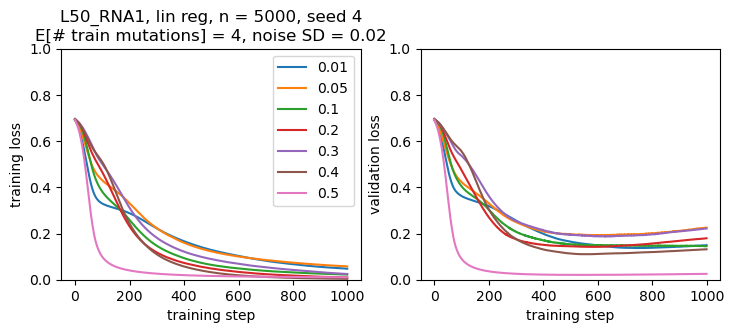

In [46]:
noise_sd = 0.02
model_name = 'lin reg'

plt.figure(figsize=(8.5, 3))
plt.subplot(121)
for i in range(len(thresholds)):
    plt.plot(train_dfs[i]['train_loss'], label=thresholds[i]);
plt.xlabel('training step');
plt.ylabel('training loss'); 
plt.title('{}, {}, n = {}, seed {}\nE[# train mutations] = {}, noise SD = {}'.format(
    landscape_name, model_name, n, seed_idx, avg_n_mut, noise_sd))
plt.legend()
plt.ylim([0, 1]);

plt.subplot(122)
for i in range(len(thresholds)):
    plt.plot(train_dfs[i]['val_loss']);
plt.xlabel('training step');
plt.ylabel('validation loss');
plt.ylim([0, 1]);

## site-wise mixing between train and least aggressive HP

In [101]:
%%notify
reload(vshifts)
reload(cal)
reload(tdre)

# data 
landscape_name = 'L50_RNA1'
seed_idx = 4
n = 5000
N = 20000
avg_n_mut = 4
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
explorer_kwarg_name2vals = {'threshold': thresholds}
save_fname_dir = '120423'
trial_idx = 1

# TDRE
n_waymarks_for_last_hp = 4
shared = False
n_hidden = 32
model_class = tdre.FeedForward
config = {
    'waymark_type': 'mixed_dimensions',  # dummy value
    'val_frac': 0.1,
    'n_steps': 1000,
    'lr': 1e-3,
    'use_weighted_loss': True
}
modela = tdre.TelescopingLogDensityRatioEstimator(
    model_class,
    50 * 4,
    n_ratio=len(thresholds),
    n_waymarks_for_last_hp=n_waymarks_for_last_hp,
    device=torch.device('cuda'),
    dtype=torch.float,
    n_hidden=n_hidden,
    shared=shared,
)
modelb = tdre.TelescopingLogDensityRatioEstimator(
    model_class,
    50 * 4,
    n_ratio=len(thresholds),
    n_waymarks_for_last_hp=0,
    device=torch.device('cuda'),
    dtype=torch.float,
    n_hidden=n_hidden,
    shared=shared,
)

X_mxnxd, y_mxn, pred_mxn, Xtrcal_nxd, Xcal_nxd, ycal_n, predcal_n = vshifts.load_rna_data(
    landscape_name,
    seed_idx,
    n,
    N,
    explorer_kwarg_name2vals,
    save_fname_dir,
    avg_n_mut,
    trial_idx=trial_idx
)

train_dfs_a = modela.fit(config, X_m1xnxd=X_mxnxd, Xm_nxp=Xtrcal_nxd)
train_dfs_b = modelb.fit(config, X_m1xnxd=X_mxnxd, Xm_nxp=Xtrcal_nxd)

Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.3.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.4.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.5.npz
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided
Waymark 1 / 4 has 160, 40 dimensions fro

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.75it/s]


Done fitting bridge 1 / (7 + 4) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.31it/s]


Done fitting bridge 2 / (7 + 4) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.02it/s]


Done fitting bridge 3 / (7 + 4) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.71it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.66it/s]


Done fitting bridge 5 / (7 + 4) (13 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 345.95it/s]


Done fitting bridge 6 / (7 + 4) (16 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.94it/s]


Done fitting bridge 7 / (7 + 4) (19 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.46it/s]


Done fitting bridge 8 / (7 + 4) (22 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.71it/s]


Done fitting bridge 9 / (7 + 4) (25 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.30it/s]


Done fitting bridge 10 / (7 + 4) (28 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.48it/s]


Done fitting bridge 11 / (7 + 4) (31 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.90it/s]


Done fitting bridge 1 / (7 + 0) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.88it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 365.12it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 375.56it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.13it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.14it/s]


Done fitting bridge 6 / (7 + 0) (16 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.13it/s]

Done fitting bridge 7 / (7 + 0) (19 s).


<IPython.core.display.Javascript object>

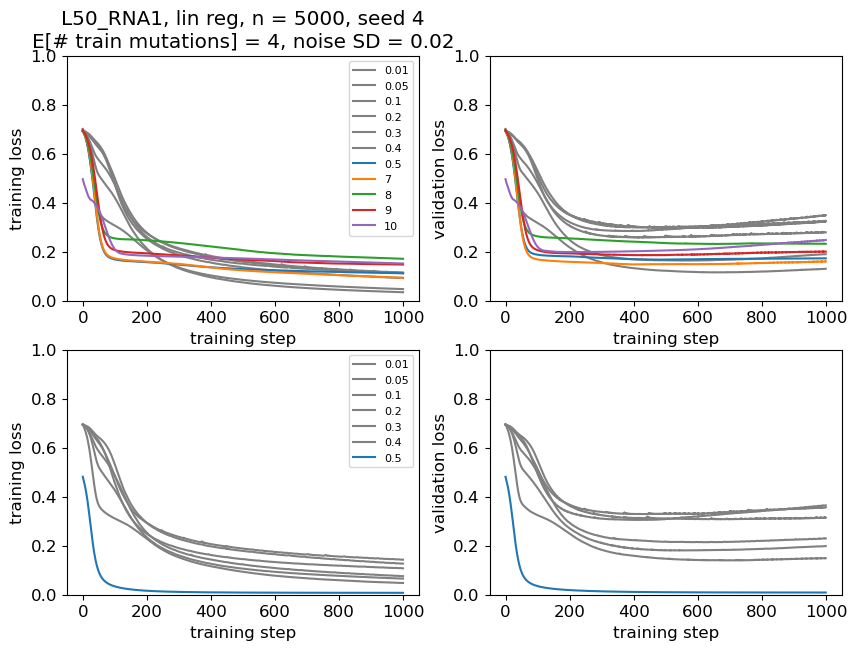

In [103]:
noise_sd = 0.02
model_name = 'lin reg'

plt.figure(figsize=(10, 7))
plt.subplot(221)
for i in range(len(train_dfs_a)):
    if i < len(thresholds) - 1:
        label = thresholds[i]
        plt.plot(train_dfs_a[i]['train_loss'], label=label, c='gray');
    elif i == len(thresholds) - 1:
        label = thresholds[-1]
        plt.plot(train_dfs_a[i]['train_loss'], label=label);
    else:
        label = i
        plt.plot(train_dfs_a[i]['train_loss'], label=label);

plt.xlabel('training step');
plt.ylabel('training loss'); 
plt.title('{}, {}, n = {}, seed {}\nE[# train mutations] = {}, noise SD = {}'.format(
    landscape_name, model_name, n, seed_idx, avg_n_mut, noise_sd))
plt.legend(fontsize=8)
plt.ylim([0, 1]);

plt.subplot(222)
for i in range(len(train_dfs_a)):
    if i < len(thresholds) - 1:
        plt.plot(train_dfs_a[i]['val_loss'], c='gray')
    else:
        plt.plot(train_dfs_a[i]['val_loss'])
    
plt.xlabel('training step');
plt.ylabel('validation loss');
plt.ylim([0, 1]);

plt.subplot(223)
for i in range(len(train_dfs_b)):
    if i < len(thresholds) - 1:
        label = thresholds[i]
        plt.plot(train_dfs_b[i]['train_loss'], label=label, c='gray');
    else:
        label = thresholds[-1]
        plt.plot(train_dfs_b[i]['train_loss'], label=label);
plt.legend(fontsize=8)
plt.xlabel('training step');
plt.ylabel('training loss'); 
plt.ylim([0, 1]);

plt.subplot(224)
for i in range(len(train_dfs_b)):
    if i < len(thresholds) - 1:
        plt.plot(train_dfs_b[i]['val_loss'], c='gray')
    else:
        plt.plot(train_dfs_b[i]['val_loss'])
    
plt.xlabel('training step');
plt.ylabel('validation loss');
plt.ylim([0, 1]);

In [107]:
# check point estimates
reload(vshifts)
reload(tdre)
reload(cal)

# data 
landscape_name = 'L50_RNA1'
seed_idx = 4
avg_n_mut = 4
n = 5000
N = 20000
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
explorer_kwarg_name2vals = {'threshold': thresholds}
save_fname_dir = '120423'
trial_idx = np.arange(20)
n_trial = trial_idx.size
# alpha = 0.1
lhat = 1

# TDRE
n_hidden = 32
n_waymarks_for_last_hp = 4
config = {
    'waymark_type': 'mixed_dimensions',  # dummy value
    'val_frac': 0.1,
    'n_steps': 1000,
    'lr': 1e-3,
    'use_weighted_loss': True
}
modela = tdre.TelescopingLogDensityRatioEstimator(
    tdre.FeedForward,
    50 * 4,
    shared=False,
    n_ratio=len(thresholds),
    n_waymarks_for_last_hp=n_waymarks_for_last_hp,
    device=torch.device('cuda'),
    dtype=torch.float
)
modelb = tdre.TelescopingLogDensityRatioEstimator(
    tdre.FeedForward,
    50 * 4,
    shared=False,
    n_ratio=len(thresholds),
    n_waymarks_for_last_hp=0,
    device=torch.device('cuda'),
    dtype=torch.float
)

t0 = time()
ppa_txm = np.zeros([trial_idx.size, len(thresholds)])
ppb_txm = np.zeros([trial_idx.size, len(thresholds)])
true_txm = np.zeros([trial_idx.size, len(thresholds)])
imp_txm = np.zeros([trial_idx.size, len(thresholds)])
format_str = ''.join(['{}'] + len(thresholds) * ['{:.3f} '])
for T_idx, T in enumerate(trial_idx):

    X_mxnxd, y_mxn, pred_mxn, Xtrcal_nxd, Xcal_nxd, ycal_n, predcal_n = vshifts.load_rna_data(
        landscape_name,
        seed_idx,
        n,
        N,
        explorer_kwarg_name2vals,
        save_fname_dir,
        avg_n_mut,
        T
    )
    
    train_dfs_a = modela.fit(config, X_m1xnxd=X_mxnxd, Xm_nxp=Xtrcal_nxd)
    train_dfs_b = modelb.fit(config, X_m1xnxd=X_mxnxd, Xm_nxp=Xtrcal_nxd)
    truemean_m = np.mean(y_mxn, axis=1)
    true_txm[T_idx] = truemean_m
    
    # imputation point estimates
    imputed_m = np.mean(pred_mxn, axis=1)
    imp_txm[T_idx] = imputed_m
    
    # PP point estimates
    ppa_m, dra_nxm = modela.forecast_meany_per_bridge(
        Xcal_nxd, ycal_n, self_normalized=True, predm_n=predcal_n, pred0_mxn=pred_mxn
    )
    ppa_txm[T_idx] = ppa_m
    ppb_m, drb_nxm = modelb.forecast_meany_per_bridge(
        Xcal_nxd, ycal_n, self_normalized=True, predm_n=predcal_n, pred0_mxn=pred_mxn
    )
    ppb_txm[T_idx] = ppb_m
    
    print('Train mean: {:.3f}'.format(np.mean(ycal_n)))
    print(format_str.format('True means          :', *truemean_m))
    print(format_str.format('Imputed means       :', *imputed_m))
    print(format_str.format('PP extra WM means   :', *ppa_m))
    print(format_str.format('PP no extra WM means:', *ppb_m))
    print('Done with trial {} / {} ({} s)'.format(T_idx + 1, len(trial_idx), int(time() - t0)))
    

Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.3.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.4.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.5.npz
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided
Waymark 1 / 4 has 160, 40 dimensions fro

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.89it/s]


Done fitting bridge 1 / (7 + 4) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.09it/s]


Done fitting bridge 2 / (7 + 4) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 360.52it/s]


Done fitting bridge 3 / (7 + 4) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.24it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.95it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.13it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.24it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.52it/s]


Done fitting bridge 8 / (7 + 4) (22 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.56it/s]


Done fitting bridge 9 / (7 + 4) (25 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 333.68it/s]


Done fitting bridge 10 / (7 + 4) (28 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.93it/s]


Done fitting bridge 11 / (7 + 4) (31 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.05it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.67it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 371.69it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.53it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.93it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 371.23it/s]


Done fitting bridge 6 / (7 + 0) (16 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.68it/s]


Done fitting bridge 7 / (7 + 0) (19 s).
Train mean: 0.287
True means          :0.410 0.386 0.380 0.365 0.349 0.344 0.340 
Imputed means       :0.438 0.429 0.427 0.413 0.402 0.399 0.396 
PP extra WM means   :0.405 0.395 0.394 0.381 0.433 0.426 0.438 
PP no extra WM means:0.458 0.395 0.394 0.379 0.369 0.365 0.363 
Done with trial 1 / 20 (54 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmu

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.26it/s]


Done fitting bridge 1 / (7 + 4) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.87it/s]


Done fitting bridge 2 / (7 + 4) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.27it/s]


Done fitting bridge 3 / (7 + 4) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.12it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 336.33it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 334.12it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 333.17it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 336.82it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.09it/s]


Done fitting bridge 9 / (7 + 4) (26 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.55it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 334.15it/s]


Done fitting bridge 11 / (7 + 4) (32 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.15it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.36it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.70it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.28it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.12it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.14it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.77it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.284
True means          :0.380 0.373 0.378 0.363 0.351 0.346 0.342 
Imputed means       :0.413 0.413 0.418 0.406 0.395 0.389 0.388 
PP extra WM means   :0.374 0.379 0.384 0.368 0.355 0.352 0.340 
PP no extra WM means:0.382 0.384 0.386 0.374 0.365 0.364 0.361 
Done with trial 2 / 20 (110 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial2/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial2/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial2/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial2/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial2/seed4-n5000-nm

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.90it/s]


Done fitting bridge 1 / (7 + 4) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.39it/s]


Done fitting bridge 2 / (7 + 4) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.17it/s]


Done fitting bridge 3 / (7 + 4) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.02it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.70it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.09it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.64it/s]


Done fitting bridge 7 / (7 + 4) (19 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.93it/s]


Done fitting bridge 8 / (7 + 4) (22 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.96it/s]


Done fitting bridge 9 / (7 + 4) (25 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.99it/s]


Done fitting bridge 10 / (7 + 4) (28 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.04it/s]


Done fitting bridge 11 / (7 + 4) (31 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 345.54it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.43it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.96it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.70it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.89it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.27it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 333.29it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.285
True means          :0.398 0.389 0.382 0.369 0.357 0.350 0.349 
Imputed means       :0.430 0.414 0.404 0.395 0.384 0.378 0.378 
PP extra WM means   :0.446 0.415 0.394 0.384 0.372 0.366 0.366 
PP no extra WM means:0.446 0.429 0.415 0.403 0.353 0.363 0.362 
Done with trial 3 / 20 (165 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial3/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial3/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial3/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial3/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial3/seed4-n5000-nm

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.52it/s]


Done fitting bridge 1 / (7 + 4) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.82it/s]


Done fitting bridge 2 / (7 + 4) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.24it/s]


Done fitting bridge 3 / (7 + 4) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.29it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.30it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.45it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.38it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.84it/s]


Done fitting bridge 8 / (7 + 4) (22 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.95it/s]


Done fitting bridge 9 / (7 + 4) (25 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.46it/s]


Done fitting bridge 10 / (7 + 4) (28 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.72it/s]


Done fitting bridge 11 / (7 + 4) (31 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 333.69it/s]


Done fitting bridge 1 / (7 + 0) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 337.73it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.15it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.29it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.68it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.96it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.46it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.284
True means          :0.410 0.409 0.394 0.369 0.354 0.347 0.344 
Imputed means       :0.432 0.433 0.421 0.405 0.395 0.389 0.386 
PP extra WM means   :0.470 0.398 0.415 0.405 0.425 0.423 0.421 
PP no extra WM means:0.486 0.482 0.439 0.416 0.393 0.391 0.389 
Done with trial 4 / 20 (221 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial4/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial4/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial4/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial4/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial4/seed4-n5000-nm

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.40it/s]


Done fitting bridge 1 / (7 + 4) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 333.58it/s]


Done fitting bridge 2 / (7 + 4) (6 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.36it/s]


Done fitting bridge 3 / (7 + 4) (9 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.52it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.20it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.81it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.73it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.83it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.04it/s]


Done fitting bridge 9 / (7 + 4) (26 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.68it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.71it/s]


Done fitting bridge 11 / (7 + 4) (32 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.84it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.10it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.21it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.53it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.08it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.32it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 318.55it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.285
True means          :0.393 0.394 0.382 0.367 0.357 0.349 0.346 
Imputed means       :0.415 0.413 0.404 0.392 0.382 0.375 0.372 
PP extra WM means   :0.430 0.401 0.387 0.391 0.402 0.396 0.394 
PP no extra WM means:0.429 0.393 0.384 0.370 0.376 0.371 0.369 
Done with trial 5 / 20 (277 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial5/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial5/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial5/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial5/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial5/seed4-n5000-nm

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.96it/s]


Done fitting bridge 1 / (7 + 4) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.21it/s]


Done fitting bridge 2 / (7 + 4) (6 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.94it/s]


Done fitting bridge 3 / (7 + 4) (9 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.70it/s]


Done fitting bridge 4 / (7 + 4) (12 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.90it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.58it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.66it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.38it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.59it/s]


Done fitting bridge 9 / (7 + 4) (26 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.26it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.44it/s]


Done fitting bridge 11 / (7 + 4) (31 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.73it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.67it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.72it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.95it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 336.66it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 283.19it/s]


Done fitting bridge 6 / (7 + 0) (18 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.23it/s]


Done fitting bridge 7 / (7 + 0) (21 s).
Train mean: 0.286
True means          :0.390 0.384 0.386 0.367 0.354 0.346 0.344 
Imputed means       :0.431 0.423 0.424 0.403 0.395 0.386 0.385 
PP extra WM means   :0.407 0.396 0.396 0.374 0.366 0.357 0.356 
PP no extra WM means:0.446 0.438 0.438 0.417 0.410 0.400 0.400 
Done with trial 6 / 20 (333 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial6/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial6/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial6/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial6/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial6/seed4-n5000-nm

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.39it/s]


Done fitting bridge 1 / (7 + 4) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.12it/s]


Done fitting bridge 2 / (7 + 4) (6 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.59it/s]


Done fitting bridge 3 / (7 + 4) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.43it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.56it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 333.95it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 337.85it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.01it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.28it/s]


Done fitting bridge 9 / (7 + 4) (26 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.75it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.89it/s]


Done fitting bridge 11 / (7 + 4) (32 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.49it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.71it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.88it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.61it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.10it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.45it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.77it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.286
True means          :0.389 0.398 0.388 0.367 0.355 0.344 0.343 
Imputed means       :0.427 0.439 0.433 0.415 0.407 0.399 0.399 
PP extra WM means   :0.436 0.423 0.364 0.376 0.363 0.355 0.356 
PP no extra WM means:0.397 0.366 0.360 0.345 0.432 0.424 0.424 
Done with trial 7 / 20 (390 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial7/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial7/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial7/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial7/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial7/seed4-n5000-nm

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 325.28it/s]


Done fitting bridge 1 / (7 + 4) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.80it/s]


Done fitting bridge 2 / (7 + 4) (6 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.80it/s]


Done fitting bridge 3 / (7 + 4) (9 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.71it/s]


Done fitting bridge 4 / (7 + 4) (12 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.19it/s]


Done fitting bridge 5 / (7 + 4) (15 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.09it/s]


Done fitting bridge 6 / (7 + 4) (18 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.42it/s]


Done fitting bridge 7 / (7 + 4) (21 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.67it/s]


Done fitting bridge 8 / (7 + 4) (24 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.40it/s]


Done fitting bridge 9 / (7 + 4) (27 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 360.44it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.21it/s]


Done fitting bridge 11 / (7 + 4) (32 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.74it/s]


Done fitting bridge 1 / (7 + 0) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.66it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.47it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.08it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.18it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.72it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.08it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.285
True means          :0.399 0.403 0.393 0.375 0.360 0.349 0.344 
Imputed means       :0.435 0.436 0.429 0.408 0.397 0.388 0.384 
PP extra WM means   :0.391 0.391 0.385 0.363 0.353 0.343 0.340 
PP no extra WM means:0.440 0.440 0.434 0.420 0.426 0.415 0.411 
Done with trial 8 / 20 (447 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial8/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial8/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial8/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial8/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial8/seed4-n5000-nm

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 315.58it/s]


Done fitting bridge 1 / (7 + 4) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.30it/s]


Done fitting bridge 2 / (7 + 4) (6 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.65it/s]


Done fitting bridge 3 / (7 + 4) (9 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.47it/s]


Done fitting bridge 4 / (7 + 4) (12 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.88it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.13it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.31it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.47it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.79it/s]


Done fitting bridge 9 / (7 + 4) (26 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.88it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.59it/s]


Done fitting bridge 11 / (7 + 4) (32 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.01it/s]


Done fitting bridge 1 / (7 + 0) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.05it/s]


Done fitting bridge 2 / (7 + 0) (6 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.02it/s]


Done fitting bridge 3 / (7 + 0) (9 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.10it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.81it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.07it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.11it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.286
True means          :0.399 0.389 0.381 0.367 0.353 0.346 0.345 
Imputed means       :0.431 0.426 0.414 0.402 0.391 0.385 0.386 
PP extra WM means   :0.448 0.444 0.432 0.419 0.408 0.401 0.401 
PP no extra WM means:0.452 0.449 0.437 0.401 0.392 0.394 0.387 
Done with trial 9 / 20 (503 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial9/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial9/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial9/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial9/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial9/seed4-n5000-nm

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.45it/s]


Done fitting bridge 1 / (7 + 4) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.34it/s]


Done fitting bridge 2 / (7 + 4) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.30it/s]


Done fitting bridge 3 / (7 + 4) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.66it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.73it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.50it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.22it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.21it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.70it/s]


Done fitting bridge 9 / (7 + 4) (26 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.08it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.72it/s]


Done fitting bridge 11 / (7 + 4) (32 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.38it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.77it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.78it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.89it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.70it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.22it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.75it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.286
True means          :0.387 0.386 0.378 0.363 0.349 0.343 0.339 
Imputed means       :0.422 0.425 0.415 0.403 0.395 0.390 0.389 
PP extra WM means   :0.412 0.462 0.446 0.376 0.368 0.365 0.360 
PP no extra WM means:0.459 0.463 0.451 0.415 0.424 0.421 0.419 
Done with trial 10 / 20 (559 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial10/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial10/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial10/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial10/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial10/seed4-n5

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.69it/s]


Done fitting bridge 1 / (7 + 4) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.28it/s]


Done fitting bridge 2 / (7 + 4) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 333.77it/s]


Done fitting bridge 3 / (7 + 4) (9 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 345.77it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.11it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.39it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.25it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.18it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.09it/s]


Done fitting bridge 9 / (7 + 4) (26 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.79it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.85it/s]


Done fitting bridge 11 / (7 + 4) (32 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.06it/s]


Done fitting bridge 1 / (7 + 0) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.36it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.62it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.48it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.60it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.43it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 345.67it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.282
True means          :0.437 0.425 0.409 0.378 0.359 0.349 0.346 
Imputed means       :0.454 0.445 0.432 0.399 0.384 0.375 0.372 
PP extra WM means   :0.409 0.400 0.387 0.354 0.339 0.329 0.327 
PP no extra WM means:0.487 0.441 0.432 0.393 0.369 0.359 0.357 
Done with trial 11 / 20 (616 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial11/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial11/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial11/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial11/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial11/seed4-n5

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 324.70it/s]


Done fitting bridge 1 / (7 + 4) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 334.78it/s]


Done fitting bridge 2 / (7 + 4) (6 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.91it/s]


Done fitting bridge 3 / (7 + 4) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.13it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.30it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.67it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.62it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.67it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.26it/s]


Done fitting bridge 9 / (7 + 4) (26 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.05it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.13it/s]


Done fitting bridge 11 / (7 + 4) (32 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.12it/s]


Done fitting bridge 1 / (7 + 0) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.28it/s]


Done fitting bridge 2 / (7 + 0) (6 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.72it/s]


Done fitting bridge 3 / (7 + 0) (9 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.60it/s]


Done fitting bridge 4 / (7 + 0) (12 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.87it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.65it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.49it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.286
True means          :0.402 0.396 0.390 0.369 0.358 0.349 0.346 
Imputed means       :0.442 0.431 0.419 0.401 0.390 0.382 0.380 
PP extra WM means   :0.413 0.401 0.390 0.392 0.381 0.373 0.371 
PP no extra WM means:0.413 0.401 0.389 0.387 0.356 0.347 0.345 
Done with trial 12 / 20 (672 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial12/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial12/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial12/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial12/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial12/seed4-n5

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.33it/s]


Done fitting bridge 1 / (7 + 4) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 318.77it/s]


Done fitting bridge 2 / (7 + 4) (6 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 326.65it/s]


Done fitting bridge 3 / (7 + 4) (9 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 326.30it/s]


Done fitting bridge 4 / (7 + 4) (12 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.50it/s]


Done fitting bridge 5 / (7 + 4) (15 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.66it/s]


Done fitting bridge 6 / (7 + 4) (18 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.84it/s]


Done fitting bridge 7 / (7 + 4) (21 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.37it/s]


Done fitting bridge 8 / (7 + 4) (24 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.57it/s]


Done fitting bridge 9 / (7 + 4) (27 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.72it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.66it/s]


Done fitting bridge 11 / (7 + 4) (32 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.16it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.50it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.34it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.08it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.53it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.88it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.50it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.284
True means          :0.371 0.387 0.381 0.367 0.356 0.348 0.344 
Imputed means       :0.401 0.412 0.409 0.395 0.385 0.380 0.379 
PP extra WM means   :0.394 0.405 0.401 0.386 0.377 0.395 0.396 
PP no extra WM means:0.391 0.405 0.402 0.440 0.430 0.425 0.424 
Done with trial 13 / 20 (729 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial13/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial13/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial13/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial13/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial13/seed4-n5

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.98it/s]


Done fitting bridge 1 / (7 + 4) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.63it/s]


Done fitting bridge 2 / (7 + 4) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.00it/s]


Done fitting bridge 3 / (7 + 4) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.89it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.21it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.22it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 345.82it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.80it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.98it/s]


Done fitting bridge 9 / (7 + 4) (25 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.08it/s]


Done fitting bridge 10 / (7 + 4) (28 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.18it/s]


Done fitting bridge 11 / (7 + 4) (31 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.86it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 322.32it/s]


Done fitting bridge 2 / (7 + 0) (6 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 333.82it/s]


Done fitting bridge 3 / (7 + 0) (9 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.35it/s]


Done fitting bridge 4 / (7 + 0) (12 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.04it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.51it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.27it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.284
True means          :0.411 0.404 0.391 0.373 0.357 0.347 0.344 
Imputed means       :0.435 0.441 0.427 0.407 0.397 0.387 0.386 
PP extra WM means   :0.444 0.467 0.451 0.387 0.377 0.367 0.366 
PP no extra WM means:0.430 0.436 0.422 0.383 0.360 0.350 0.349 
Done with trial 14 / 20 (785 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial14/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial14/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial14/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial14/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial14/seed4-n5

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.38it/s]


Done fitting bridge 1 / (7 + 4) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.81it/s]


Done fitting bridge 2 / (7 + 4) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.00it/s]


Done fitting bridge 3 / (7 + 4) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.11it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.26it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.36it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.16it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.94it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.87it/s]


Done fitting bridge 9 / (7 + 4) (26 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.75it/s]


Done fitting bridge 10 / (7 + 4) (28 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.14it/s]


Done fitting bridge 11 / (7 + 4) (31 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.89it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.15it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 345.76it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.60it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.71it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 334.38it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.48it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.286
True means          :0.425 0.404 0.384 0.367 0.358 0.349 0.347 
Imputed means       :0.440 0.423 0.417 0.401 0.393 0.385 0.384 
PP extra WM means   :0.436 0.419 0.418 0.446 0.439 0.431 0.430 
PP no extra WM means:0.436 0.419 0.413 0.404 0.410 0.402 0.400 
Done with trial 15 / 20 (841 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial15/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial15/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial15/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial15/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial15/seed4-n5

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.31it/s]


Done fitting bridge 1 / (7 + 4) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.19it/s]


Done fitting bridge 2 / (7 + 4) (6 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 333.48it/s]


Done fitting bridge 3 / (7 + 4) (9 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.97it/s]


Done fitting bridge 4 / (7 + 4) (12 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.42it/s]


Done fitting bridge 5 / (7 + 4) (15 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.40it/s]


Done fitting bridge 6 / (7 + 4) (18 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 339.35it/s]


Done fitting bridge 7 / (7 + 4) (21 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 359.90it/s]


Done fitting bridge 8 / (7 + 4) (24 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 333.00it/s]


Done fitting bridge 9 / (7 + 4) (27 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.49it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.10it/s]


Done fitting bridge 11 / (7 + 4) (32 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.88it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.83it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.70it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.14it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.14it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.17it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.99it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.286
True means          :0.412 0.410 0.388 0.372 0.358 0.351 0.344 
Imputed means       :0.438 0.437 0.417 0.404 0.394 0.383 0.380 
PP extra WM means   :0.423 0.422 0.427 0.392 0.383 0.371 0.368 
PP no extra WM means:0.448 0.448 0.427 0.363 0.354 0.343 0.340 
Done with trial 16 / 20 (897 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial16/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial16/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial16/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial16/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial16/seed4-n5

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.71it/s]


Done fitting bridge 1 / (7 + 4) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.77it/s]


Done fitting bridge 2 / (7 + 4) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.82it/s]


Done fitting bridge 3 / (7 + 4) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.62it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.47it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.53it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.76it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.01it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.07it/s]


Done fitting bridge 9 / (7 + 4) (26 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 359.29it/s]


Done fitting bridge 10 / (7 + 4) (28 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.92it/s]


Done fitting bridge 11 / (7 + 4) (31 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.70it/s]


Done fitting bridge 1 / (7 + 0) (3 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.38it/s]


Done fitting bridge 2 / (7 + 0) (6 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.74it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.50it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.43it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.06it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.04it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.287
True means          :0.398 0.389 0.381 0.365 0.353 0.348 0.344 
Imputed means       :0.427 0.420 0.411 0.396 0.386 0.383 0.379 
PP extra WM means   :0.423 0.394 0.402 0.393 0.382 0.380 0.375 
PP no extra WM means:0.416 0.412 0.408 0.413 0.393 0.391 0.386 
Done with trial 17 / 20 (953 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial17/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial17/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial17/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial17/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial17/seed4-n5

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.33it/s]


Done fitting bridge 1 / (7 + 4) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 345.47it/s]


Done fitting bridge 2 / (7 + 4) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.23it/s]


Done fitting bridge 3 / (7 + 4) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 325.99it/s]


Done fitting bridge 4 / (7 + 4) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.71it/s]


Done fitting bridge 5 / (7 + 4) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.00it/s]


Done fitting bridge 6 / (7 + 4) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.50it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.88it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.04it/s]


Done fitting bridge 9 / (7 + 4) (26 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.87it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 359.76it/s]


Done fitting bridge 11 / (7 + 4) (32 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.14it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 339.77it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 339.42it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.26it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.05it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.44it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.61it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.284
True means          :0.397 0.382 0.371 0.360 0.346 0.339 0.336 
Imputed means       :0.446 0.430 0.420 0.409 0.399 0.393 0.394 
PP extra WM means   :0.380 0.365 0.354 0.395 0.385 0.379 0.380 
PP no extra WM means:0.405 0.390 0.380 0.368 0.358 0.352 0.353 
Done with trial 18 / 20 (1010 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial18/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial18/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial18/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial18/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial18/seed4-n

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 337.83it/s]


Done fitting bridge 1 / (7 + 4) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.63it/s]


Done fitting bridge 2 / (7 + 4) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 336.45it/s]


Done fitting bridge 3 / (7 + 4) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 315.83it/s]


Done fitting bridge 4 / (7 + 4) (12 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.01it/s]


Done fitting bridge 5 / (7 + 4) (15 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.75it/s]


Done fitting bridge 6 / (7 + 4) (18 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.55it/s]


Done fitting bridge 7 / (7 + 4) (20 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.36it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.72it/s]


Done fitting bridge 9 / (7 + 4) (26 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.08it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.68it/s]


Done fitting bridge 11 / (7 + 4) (32 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.76it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.51it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.42it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.43it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.97it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.12it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.80it/s]


Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.284
True means          :0.414 0.394 0.384 0.368 0.353 0.347 0.342 
Imputed means       :0.442 0.430 0.416 0.400 0.390 0.385 0.381 
PP extra WM means   :0.396 0.402 0.404 0.430 0.419 0.414 0.410 
PP no extra WM means:0.431 0.418 0.393 0.359 0.352 0.347 0.343 
Done with trial 19 / 20 (1066 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial19/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial19/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial19/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial19/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial19/seed4-n

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 339.03it/s]


Done fitting bridge 1 / (7 + 4) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.73it/s]


Done fitting bridge 2 / (7 + 4) (6 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.78it/s]


Done fitting bridge 3 / (7 + 4) (9 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.01it/s]


Done fitting bridge 4 / (7 + 4) (12 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.58it/s]


Done fitting bridge 5 / (7 + 4) (15 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.31it/s]


Done fitting bridge 6 / (7 + 4) (18 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.73it/s]


Done fitting bridge 7 / (7 + 4) (21 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.12it/s]


Done fitting bridge 8 / (7 + 4) (23 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.08it/s]


Done fitting bridge 9 / (7 + 4) (26 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.09it/s]


Done fitting bridge 10 / (7 + 4) (29 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.94it/s]


Done fitting bridge 11 / (7 + 4) (32 s).
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.23it/s]


Done fitting bridge 1 / (7 + 0) (2 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.73it/s]


Done fitting bridge 2 / (7 + 0) (5 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.63it/s]


Done fitting bridge 3 / (7 + 0) (8 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.43it/s]


Done fitting bridge 4 / (7 + 0) (11 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.56it/s]


Done fitting bridge 5 / (7 + 0) (14 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.21it/s]


Done fitting bridge 6 / (7 + 0) (17 s).


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.06it/s]

Done fitting bridge 7 / (7 + 0) (20 s).
Train mean: 0.286
True means          :0.407 0.398 0.383 0.368 0.358 0.350 0.347 
Imputed means       :0.431 0.423 0.409 0.393 0.382 0.374 0.374 
PP extra WM means   :0.438 0.429 0.415 0.363 0.353 0.344 0.344 
PP no extra WM means:0.440 0.429 0.415 0.399 0.371 0.363 0.363 
Done with trial 20 / 20 (1123 s)


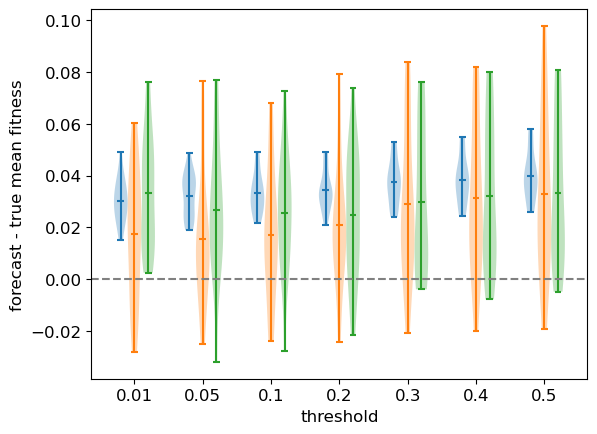

In [108]:
loc = np.arange(len(thresholds))
plt.violinplot(imp_txm - true_txm, loc - 0.2, widths=0.2, showmeans=True);
plt.violinplot(ppa_txm - true_txm, loc, widths=0.2, showmeans=True);
plt.violinplot(ppb_txm - true_txm, loc + 0.2, widths=0.2, showmeans=True);
plt.axhline(0, linestyle='--', color='gray')
plt.xticks(loc, labels=thresholds)
plt.xlabel('threshold');
plt.ylabel('forecast - true mean fitness');

## multiclass

In [66]:
reload(vshifts)
reload(cal)
reload(tdre)

# data 
landscape_name = 'L50_RNA1'
seed_idx = 4
n = 5000
N = 20000
avg_n_mut = 4
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
explorer_kwarg_name2vals = {'threshold': thresholds}
save_fname_dir = '120423'
trial_idx = 1

# TDRE
n_hidden = 256
config = {
    'waymark_type': 'mixed_dimensions',  # dummy value
    'val_frac': 0.1,
    'n_steps': 2000,
    'lr': 1e-3,
    'use_weighted_loss': True,
    'kd_bandwidth': 0.2
}
model = tdre.TelescopingLogDensityRatioEstimator(
    None,
    50 * 4,
    n_ratio=len(thresholds),
    n_waymarks_for_last_hp=0,
    device=torch.device('cuda'),
    dtype=torch.float,
    n_hidden=n_hidden,
    shared=False,
    multiclass=True,
    cranmer=False,
)

X_mxnxd, y_mxn, pred_mxn, Xtrcal_nxd, Xcal_nxd, ycal_n, predcal_n = vshifts.load_rna_data(
    landscape_name,
    seed_idx,
    n,
    N,
    explorer_kwarg_name2vals,
    save_fname_dir,
    avg_n_mut,
    trial_idx=trial_idx
)

train_dfs = model.fit(config, X_m1xnxd=X_mxnxd, Xm_nxp=Xtrcal_nxd)

Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.3.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.4.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.5.npz
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:37<00:00, 53.99it/s]


In [23]:
X_m1xnxd = list(X_mxnxd) + [Xtrcal_nxd]
num_kd_m = []
denom_kd_m = []
tX_m1xnxd = [torch.from_numpy(X_nxd).to(device=model.device, dtype=model.dtype) for X_nxd in X_m1xnxd]
print(len(tX_m1xnxd))

train_ldr_nxm = model._get_ldr_nxm(tX_m1xnxd[-1]).cpu().detach().numpy()
design_ldr_nxm = np.zeros([tX_m1xnxd[0].shape[0], X_mxnxd.shape[0]])
# k-th column is the estimated LDRs of design distribution k,
# for samples from design distribution k

for k in range(len(tX_m1xnxd) - 1):
    ldr_nxm = model._get_ldr_nxm(tX_m1xnxd[k]).cpu().detach().numpy()
    
    kd = KernelDensity(bandwidth=0.5)
    kd.fit(ldr_nxm[:, k][:, None])
    design_ldr_nxm[:, k] = ldr_nxm[:, k]
    num_kd_m.append(kd)
    
    kd.fit(train_ldr_nxm[:, k][:, None])
    denom_kd_m.append(kd)
    
design_cmap = matplotlib.colormaps['Greens_r']
train_cmap = matplotlib.colormaps['Purples_r']
bw = 0.3

ks = [3, 2, 1, 0]
for ki, k in enumerate(ks):
    color = design_cmap(ki / len(ks))
    plt.hist(
        design_ldr_nxm[:, k], alpha=0.6,
        bins=20, density=True,
        color=color, label='design {}'.format(thresholds[k])
    );
    sns.kdeplot(design_ldr_nxm[:, k], bw_method=bw, color=color);
    print(np.mean(design_ldr_nxm[:, k]))
    
    color = train_cmap(ki / len(ks))
    plt.hist(
        train_ldr_nxm[:, k], alpha=0.6,
        bins=20, density=True,
        color=color, label='train {}'.format(thresholds[k])
    );
    sns.kdeplot(train_ldr_nxm[:, k], bw_method=bw, color=color);
plt.legend();

8


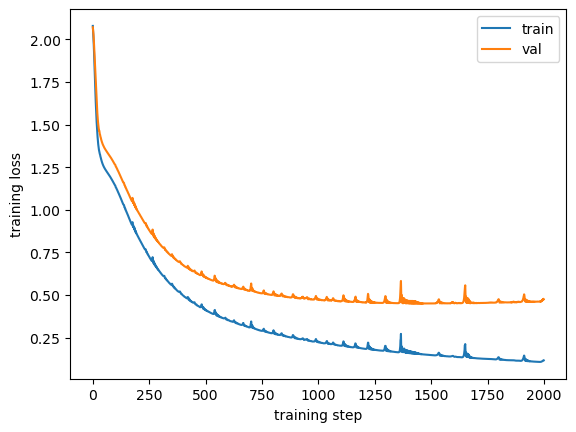

In [67]:
plt.plot(train_dfs['train_loss'], label='train')
plt.plot(train_dfs['val_loss'], label='val')
plt.xlabel('training step');
plt.ylabel('training loss'); 
plt.legend();
# plt.ylim([0, 1]);

In [47]:
format_str = ''.join(['{}'] + len(thresholds) * ['{:.3f} '])
truemean_m = np.mean(y_mxn, axis=1)
    
# imputation point estimates
imputed_m = np.mean(pred_mxn, axis=1)

# PP point estimates
# ppa_m, dra_nxm = model.forecast_meany_per_bridge(
#     Xcal_nxd, ycal_n, cranmer=True, self_normalized=True, predm_n=predcal_n, pred0_mxn=pred_mxn
# )
ppb_m, drb_nxm = model.forecast_meany_per_bridge(
    Xcal_nxd, ycal_n, cranmer=False, self_normalized=True, predm_n=predcal_n, pred0_mxn=pred_mxn
)
print(format_str.format('True means           :', *truemean_m))
print(format_str.format('Imputed means        :', *imputed_m))
# print(format_str.format('PP multiclass Cranmer:', *ppa_m))
print(format_str.format('PP multiclass        :', *ppb_m))

True means           :0.380 0.373 0.378 0.363 0.351 0.346 0.342 
Imputed means        :0.413 0.413 0.418 0.406 0.395 0.389 0.388 
PP multiclass Cranmer:0.381 0.381 0.386 0.371 0.353 0.352 0.347 
PP multiclass        :0.378 0.381 0.385 0.373 0.362 0.356 0.355 


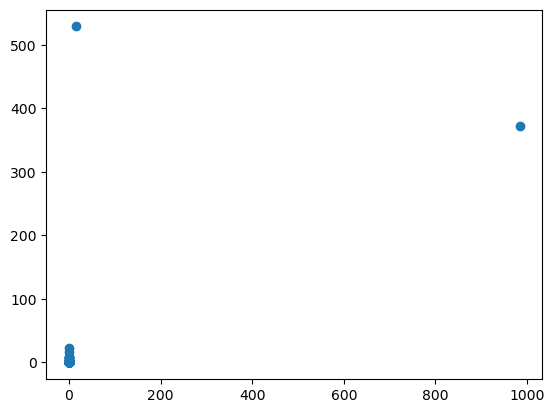

In [50]:
plt.scatter(drb_nxm[:, 6], dra_nxm[:, 6]);

In [56]:
# check point estimates
reload(vshifts)
reload(tdre)
reload(cal)

# data 
landscape_name = 'L50_RNA1'
seed_idx = 4
avg_n_mut = 4
n = 5000
N = 20000
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
explorer_kwarg_name2vals = {'threshold': thresholds}
save_fname_dir = '120423'
trial_idx = np.arange(20)
n_trial = trial_idx.size
lhat = 1

# TDRE
n_hidden = 256
config = {
    'waymark_type': 'mixed_dimensions',  # dummy value
    'val_frac': 0.1,
    'n_steps': 2000,
    'lr': 1e-3,
    'use_weighted_loss': True,
    'kde_bandwidth': 0.1
}
modela = tdre.TelescopingLogDensityRatioEstimator(
    None,
    50 * 4,
    n_hidden=n_hidden,
    shared=False,
    n_ratio=len(thresholds),
    n_waymarks_for_last_hp=0,
    device=torch.device('cuda'),
    dtype=torch.float,
    multiclass=True,
    cranmer=True
)
# modelb = tdre.TelescopingLogDensityRatioEstimator(
#     tdre.FeedForward,
#     50 * 4,
#     n_hidden=16,
#     shared=False,
#     n_ratio=len(thresholds),
#     n_waymarks_for_last_hp=0,
#     device=torch.device('cuda'),
#     dtype=torch.float,
#     multiclass=False,
#     cranmer=Tru
# )

t0 = time()
ppa_txm = np.zeros([trial_idx.size, len(thresholds)])
ppb_txm = np.zeros([trial_idx.size, len(thresholds)])
true_txm = np.zeros([trial_idx.size, len(thresholds)])
imp_txm = np.zeros([trial_idx.size, len(thresholds)])
format_str = ''.join(['{}'] + len(thresholds) * ['{:.3f} '])
for T_idx, T in enumerate(trial_idx):

    X_mxnxd, y_mxn, pred_mxn, Xtrcal_nxd, Xcal_nxd, ycal_n, predcal_n = vshifts.load_rna_data(
        landscape_name,
        seed_idx,
        n,
        N,
        explorer_kwarg_name2vals,
        save_fname_dir,
        avg_n_mut,
        T
    )
    
    train_dfs_a = modela.fit(config, X_m1xnxd=X_mxnxd, Xm_nxp=Xtrcal_nxd)
    # train_dfs_b = modelb.fit(bconfig, X_m1xnxd=X_mxnxd, Xm_nxp=Xtrcal_nxd)
    truemean_m = np.mean(y_mxn, axis=1)
    true_txm[T_idx] = truemean_m
    
    # imputation point estimates
    imputed_m = np.mean(pred_mxn, axis=1)
    imp_txm[T_idx] = imputed_m
    
    # PP point estimates
    ppa_m, dra_nxm = modela.forecast_meany_per_bridge(
        Xcal_nxd, ycal_n, cranmer=True, self_normalized=True, predm_n=predcal_n, pred0_mxn=pred_mxn
    )
    ppa_txm[T_idx] = ppa_m
    ppb_m, drb_nxm = modela.forecast_meany_per_bridge(
        Xcal_nxd, ycal_n, cranmer=False, self_normalized=True, predm_n=predcal_n, pred0_mxn=pred_mxn
    )
    ppb_txm[T_idx] = ppb_m
    
    print('Train mean: {:.3f}'.format(np.mean(ycal_n)))
    print(format_str.format('True means   :', *truemean_m))
    print(format_str.format('Imputed means:', *imputed_m))
    print(format_str.format('PP Cranmer   :', *ppa_m))
    print(format_str.format('PP no Cranmer:', *ppb_m))
    print('Done with trial {} / {} ({} s)'.format(T_idx + 1, len(trial_idx), int(time() - t0)))
    

Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.3.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.4.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial0/seed4-n5000-nmut4-threshold0.5.npz
X_m1xnxd is shape (7, 20000, 200), Xm_nxp is shape (5000, 200). 7 waymarks provided


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:29<00:00, 68.12it/s]


Not returning normalized weights
Not returning normalized weights
Train mean: 0.287
True means   :0.410 0.386 0.380 0.365 0.349 0.344 0.340 
Imputed means:0.438 0.429 0.427 0.413 0.402 0.399 0.396 
PP Cranmer   :0.438 0.429 0.427 0.413 0.402 0.399 0.396 
PP no Cranmer:0.438 0.429 0.427 0.413 0.402 0.399 0.396 
Done with trial 1 / 20 (33 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial1/seed4-n5000-nmut4

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:29<00:00, 66.98it/s]
/homefs/home/wongfanc/density-ratio-estimation/tdre.py:745: RuntimeWarning: overflow encountered in exp
  dr_nxm = np.exp(ldr_nxm)


Not returning normalized weights
Not returning normalized weights
Train mean: 0.284
True means   :0.380 0.373 0.378 0.363 0.351 0.346 0.342 
Imputed means:0.413 0.413 0.418 0.406 0.395 0.389 0.388 
PP Cranmer   :-inf -inf -inf -13032724796865559564619596324506356385969573245912489430670675108382134878646598369280.000 -inf -2344059601214933660470996198965576504019770244000350384944726886015587804853115652291948629847030743229837553750880167773564041885755878458097723098918592681712539314642532465461894527161826764946177719214481288626507782708227022825904775680565090854112959424510591011992765464576.000 -inf 
PP no Cranmer:0.413 0.413 0.411 0.172 0.165 0.289 0.290 
Done with trial 2 / 20 (68 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial2/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/won

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:29<00:00, 67.43it/s]
/homefs/home/wongfanc/density-ratio-estimation/tdre.py:745: RuntimeWarning: overflow encountered in exp
  dr_nxm = np.exp(ldr_nxm)


Not returning normalized weights
Not returning normalized weights
Train mean: 0.285
True means   :0.398 0.389 0.382 0.369 0.357 0.350 0.349 
Imputed means:0.430 0.414 0.404 0.395 0.384 0.378 0.378 
PP Cranmer   :0.430 0.414 inf 0.395 0.384 885613510562.610 97809297873047094552143281708755476608450560.000 
PP no Cranmer:0.430 0.414 0.404 0.395 0.384 0.378 0.379 
Done with trial 3 / 20 (101 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial3/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial3/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial3/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial3/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/d

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:29<00:00, 67.12it/s]


Not returning normalized weights
Not returning normalized weights
Train mean: 0.284
True means   :0.410 0.409 0.394 0.369 0.354 0.347 0.344 
Imputed means:0.432 0.433 0.421 0.405 0.395 0.389 0.386 
PP Cranmer   :0.432 0.433 0.421 0.405 0.395 0.388 0.387 
PP no Cranmer:0.432 0.433 0.421 0.405 0.395 0.389 0.387 
Done with trial 4 / 20 (135 s)
Problem has sequence length 50
Loading waymarks in the following order for k = 0, 1, ... where k = 0 is the target design distribution.
[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial4/seed4-n5000-nmut4-threshold0.01.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial4/seed4-n5000-nmut4-threshold0.05.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial4/seed4-n5000-nmut4-threshold0.1.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial4/seed4-n5000-nmut4-threshold0.2.npz
Loading from /data/wongfanc/dre-data/data/120423/L50_RNA1/trial4/seed4-n5000-nmut

 15%|██████████████████████▍                                                                                                                                 | 295/2000 [00:04<00:25, 66.26it/s]

KeyboardInterrupt



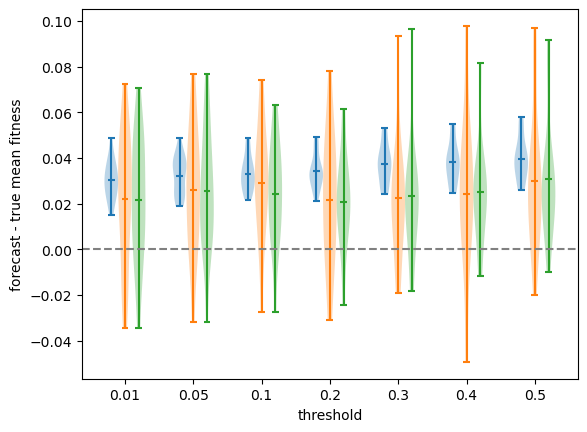

In [55]:
loc = np.arange(len(thresholds))
plt.violinplot(imp_txm - true_txm, loc - 0.2, widths=0.2, showmeans=True);
plt.violinplot(ppa_txm - true_txm, loc, widths=0.2, showmeans=True);
plt.violinplot(ppb_txm - true_txm, loc + 0.2, widths=0.2, showmeans=True);
plt.axhline(0, linestyle='--', color='gray')
plt.xticks(loc, labels=thresholds)
plt.xlabel('threshold');
plt.ylabel('forecast - true mean fitness');